In [1]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2121560/3219724251.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_2_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")


0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25


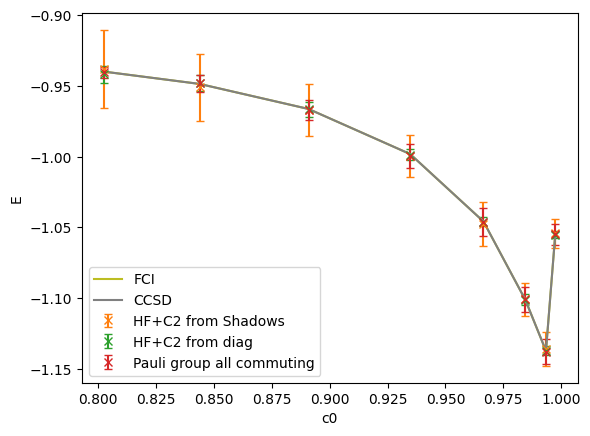

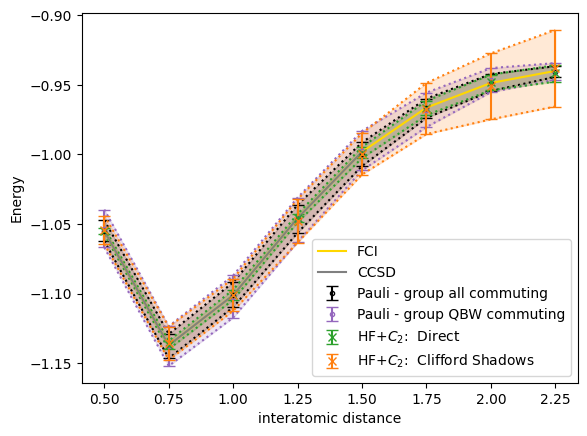

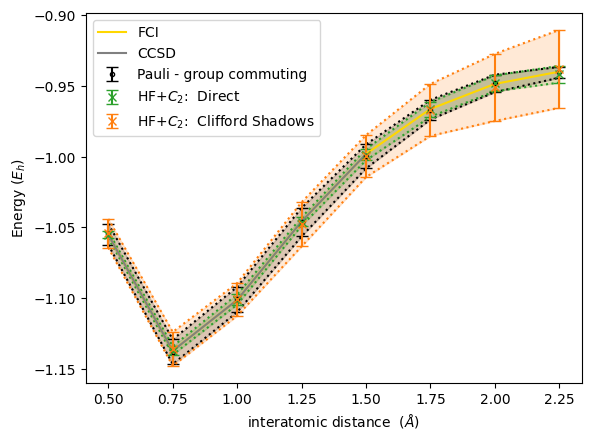

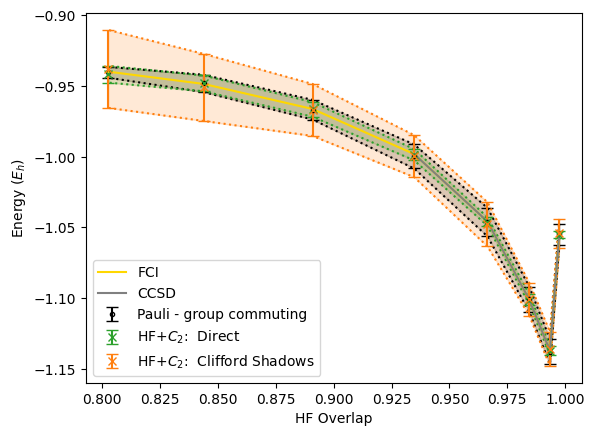

In [12]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    print(U_str)
    data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_2_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25


<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2121560/3579945514.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_4_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")


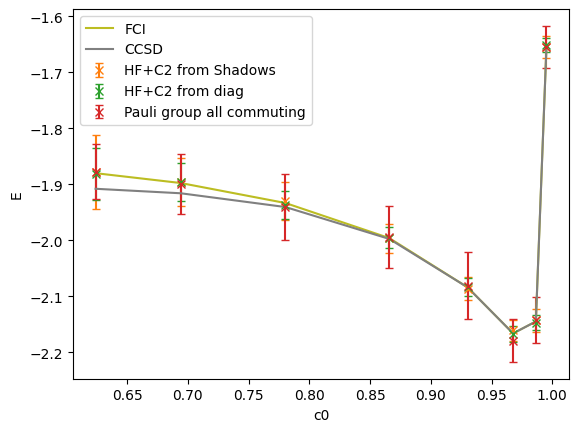

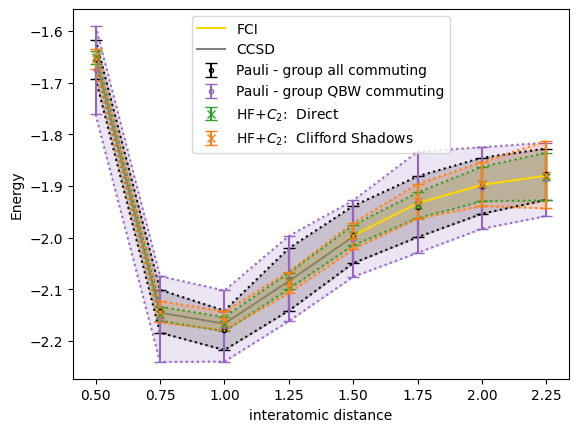

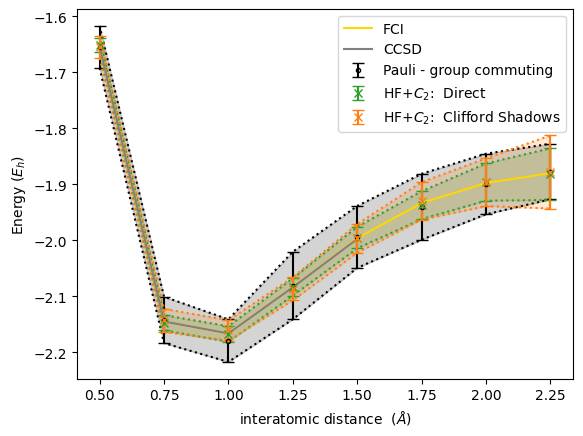

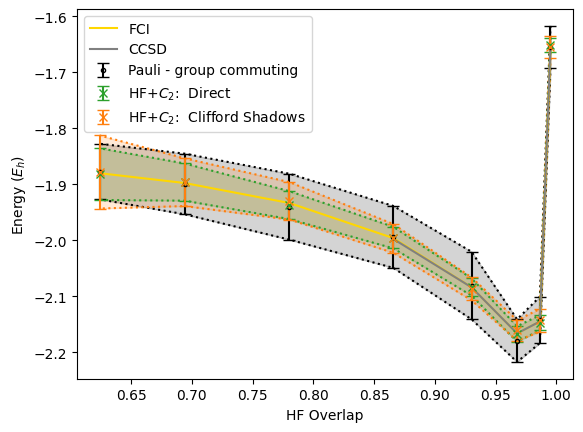

In [14]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    print(U_str)
    data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_4_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_6691/43971702.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_6_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")


0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25


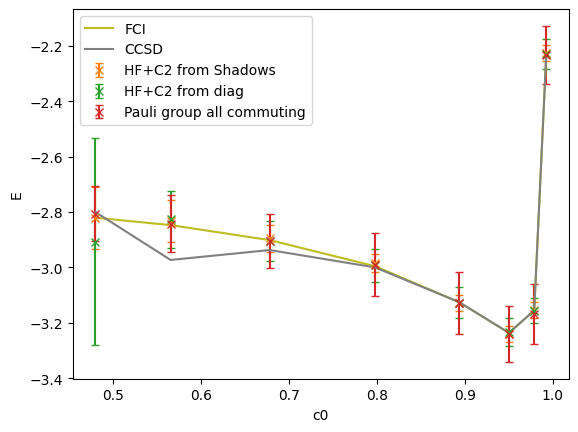

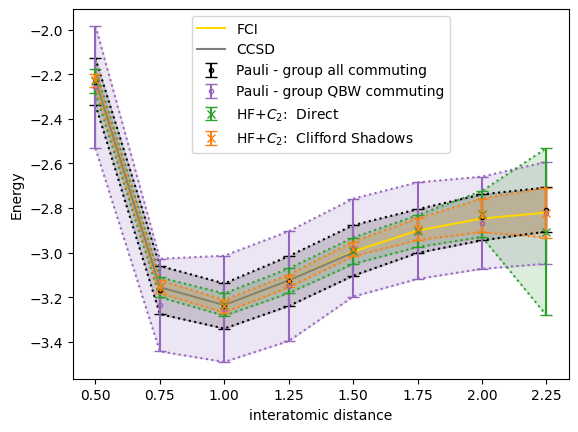

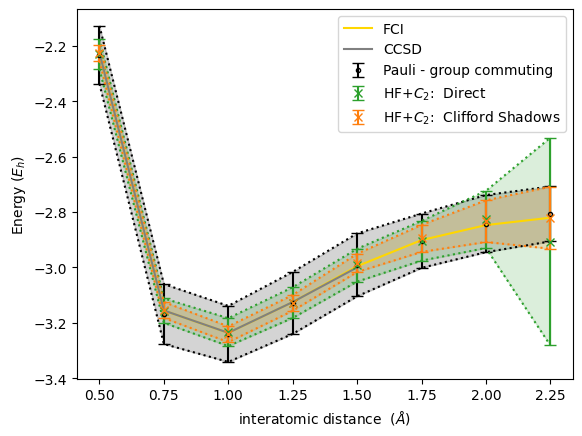

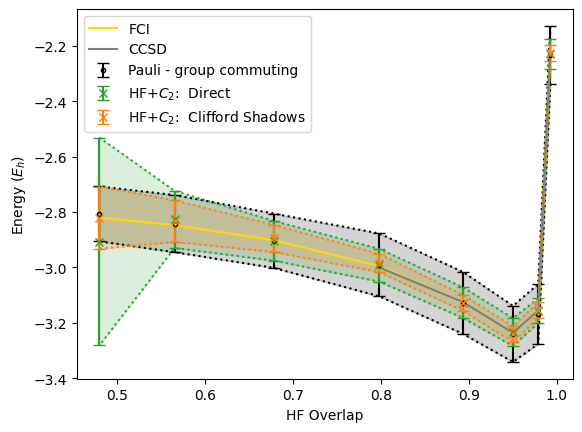

In [1]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    print(U_str)
    data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_6_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

0.5 97
0.75 100
1.0 100
1.25 100
1.5 100
1.75 100
2.0 99
2.25 100


<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_393283/3350515818.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_8_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")


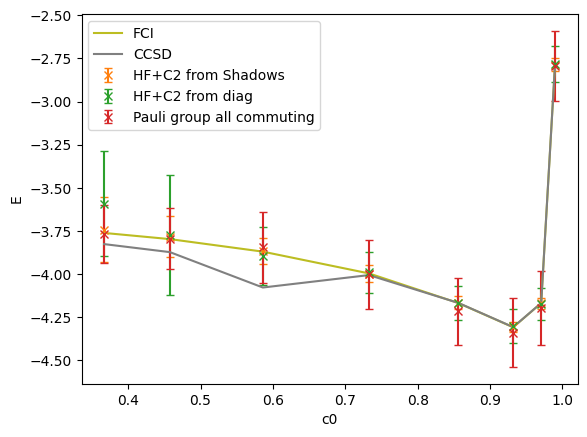

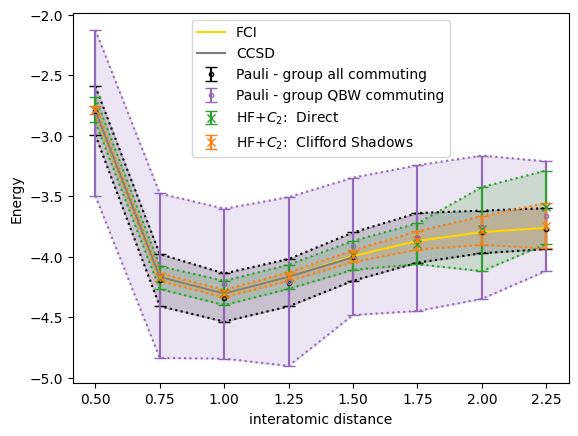

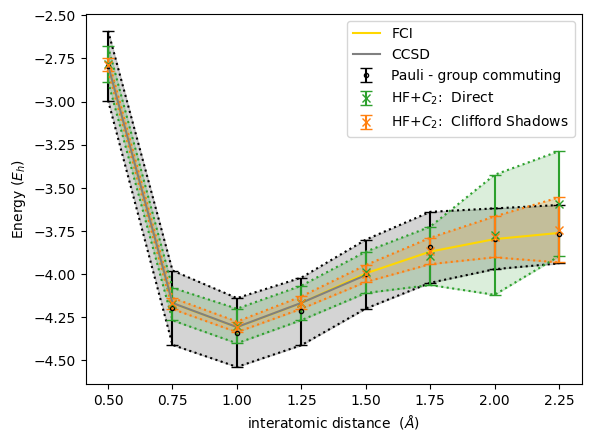

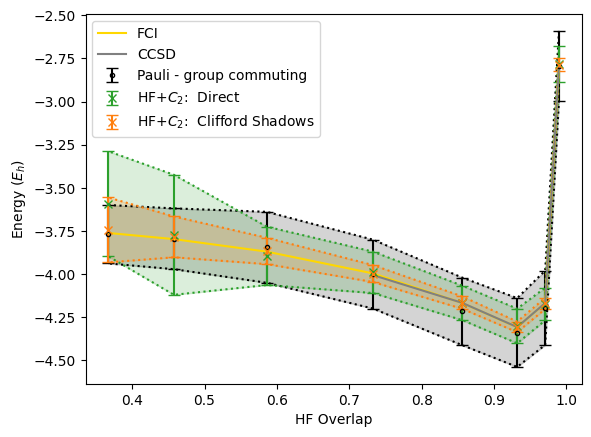

In [ ]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    # print(U_str)
    data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_8_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    print(U_str,len(data_hf_cs))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3056955/2435104134.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_10_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")


0.5 103
0.75 102
1.0 103
1.25 114
1.5 114
1.75 100
2.0 274
2.25 395


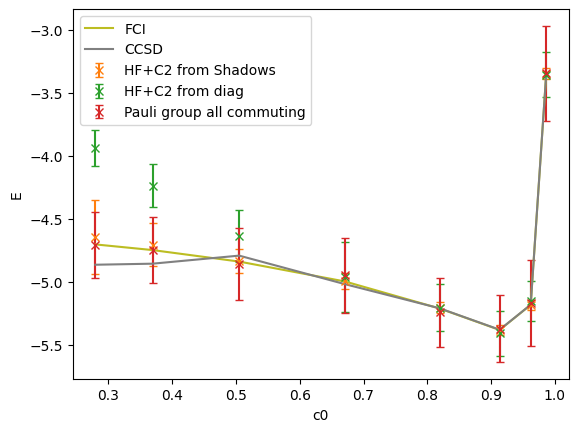

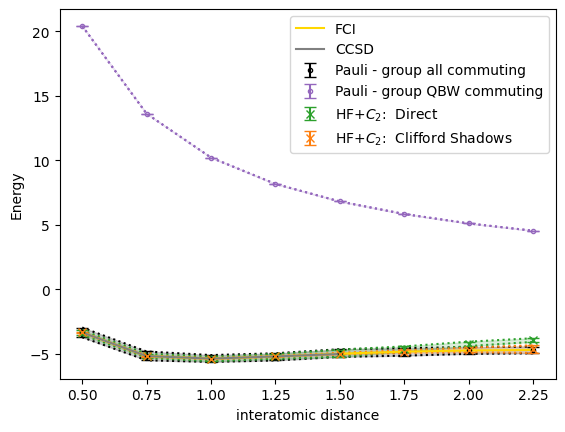

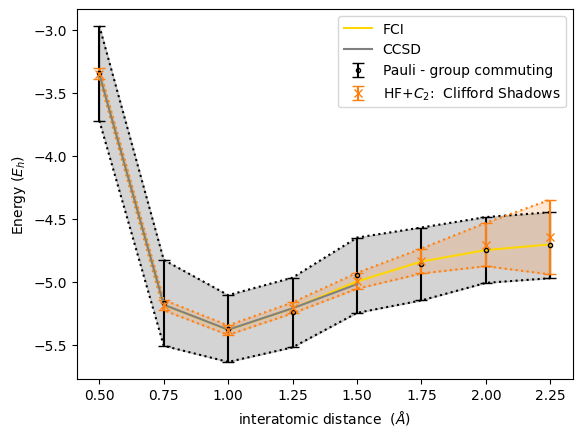

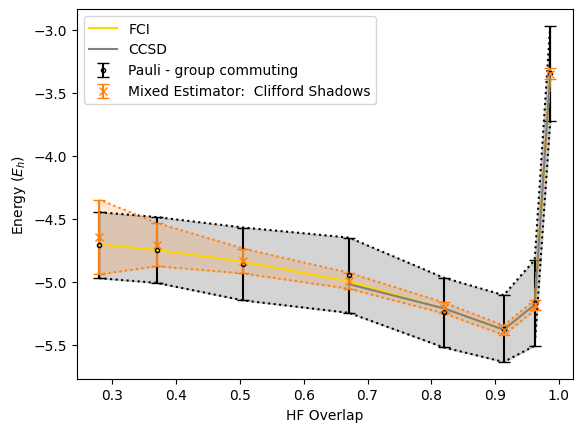

In [2]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    # print(U_str)
    data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_10_nshots_1000_d_"+U_str+"_fixed_runs.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    print(U_str,len(data_hf_cs))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()#/np.sqrt(len(data["HF+CS"]))

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
# plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
# plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
# plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
# plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="Mixed Estimator"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
# plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

2.25 64
-4.702547702674668 -4.688350716368708 -4.701263063693803


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3056955/3616992897.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_10_nshots_20000_d_"+"2.25"+"_fixed_runs.dat", sep="\s+")


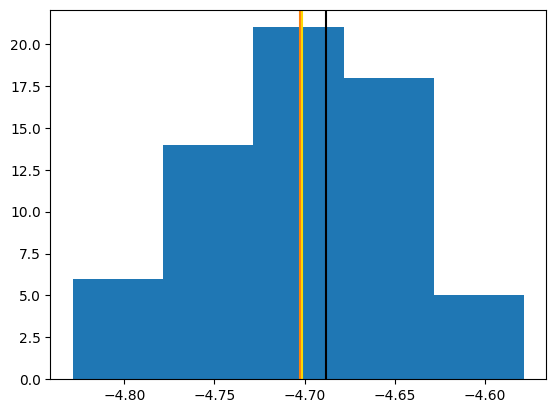

In [3]:
data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_10_nshots_20000_d_"+"2.25"+"_fixed_runs.dat", sep="\s+")
data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
data_pauli = data["pauli_all"]
e_fci = data["e_fci"][0]
print(U_str,len(data_hf_cs))
hf_cs_points=data_hf_cs[:177]
binwidth = 0.05#075
plt.hist(hf_cs_points,bins=np.arange(min(hf_cs_points), max(hf_cs_points) + binwidth, binwidth))
plt.axvline(np.mean(hf_cs_points),c="C1")
plt.axvline(np.mean(data_pauli),c="k")
plt.axvline(e_fci,c="gold")
print(np.mean(hf_cs_points),np.mean(data_pauli),e_fci)

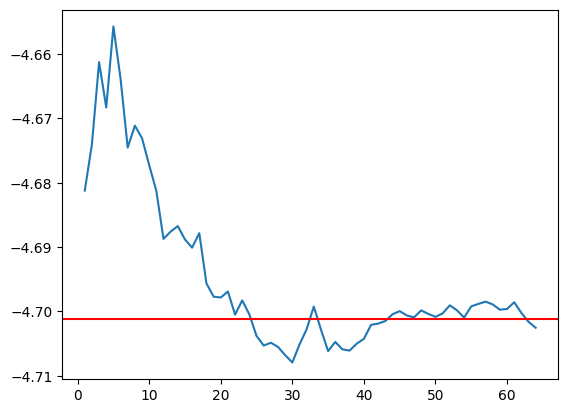

In [4]:
mean_movement=[]
for n in range(1,1+len(data_hf_cs)):
    mean_movement.append(np.mean(data_hf_cs[:n]))

plt.plot(range(1,1+len(data_hf_cs)),mean_movement)
plt.axhline(e_fci,c="r")    

2
4
6
8
10
12
activated!


<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:29: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_3056955/1119933774.py:23: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("results_comp_Hydrogen1D_dmrg_CCSD_conv_check_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
/tmp/ipykernel_3056955/1119933774.py:29: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_"+U_str+"_nshots_1000_d_1.5_fixed_runs.dat", sep="\s+")


Text(0.815, 0.35, 'interatomic distance $=1.5$')

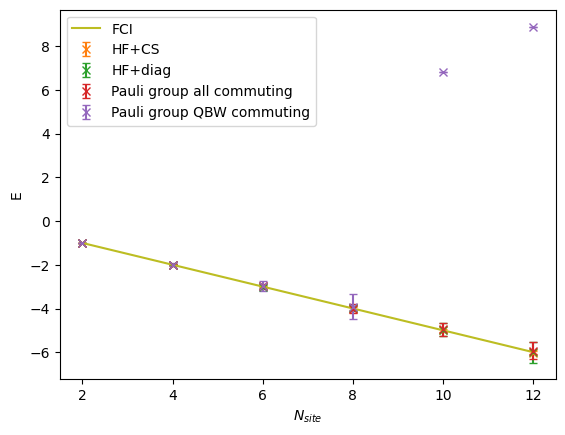

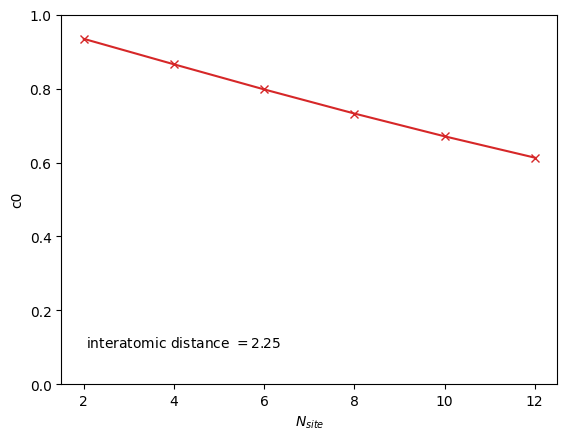

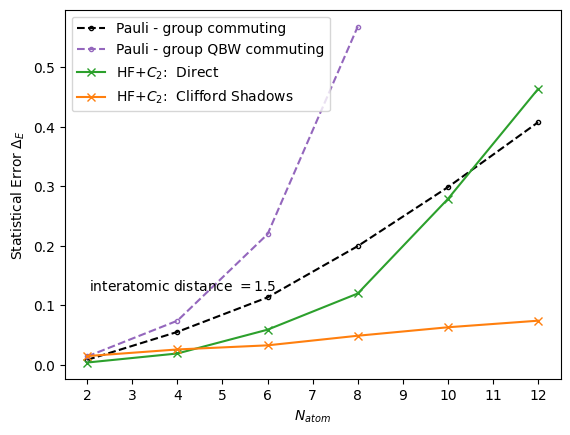

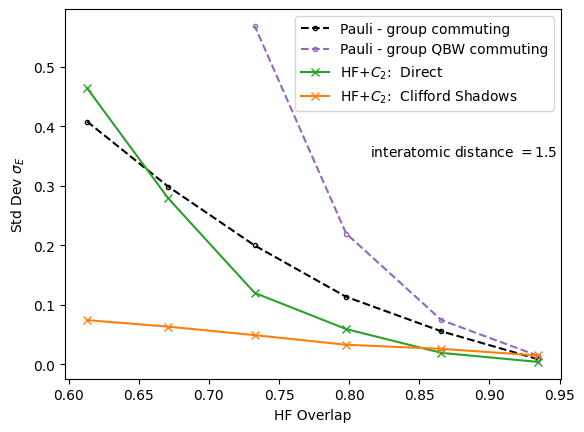

In [11]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
from matplotlib import ticker
data_files_list=["2","4","6","8","10","12"]#,"16.0"]
c0_list=[]
fci_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
# for U_str in data_files_list:
#     data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_"+U_str+"_nshots_1000_d_1.5_fixed_runs.dat", sep="\s+")
#     print(len(data["c0"]))
for U_str in data_files_list:
    print(U_str)
    if U_str == "12":
        data = pd.read_csv("results_comp_Hydrogen1D_dmrg_CCSD_conv_check_nsite_"+U_str+"_nshots_1000_d_1.5.dat", sep="\s+")
        
        print("activated!")
        data_hf_cs = data["HF+CS"]
    else:    
        # data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_"+U_str+"_nshots_1000_d_1.5_fixed_runs.dat", sep="\s+")
        data = pd.read_csv("energy_method_comp_data/april_results/results_comp_Hydrogen1D_FCI_SV_nsite_"+U_str+"_nshots_1000_d_1.5_fixed_runs.dat", sep="\s+")
        data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))

    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    hf_mean=((data["e_hf"])).mean()

    
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
# plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
# plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
# plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# # plt.plot(c0_list,hf_list,c="C7",label="HF")   
# plt.plot(c0_list,fci_list,c="C8",label="FCI")   
# plt.xlabel("c0")
# plt.ylabel("E")
# plt.legend()
# #plt.ylim(-0.1,1.0)
# #plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
# plt.figure()

U_list=[float(x) for x in data_files_list]
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+CS")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+diag")
plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("E")
plt.legend()
plt.figure()

U_list=[float(x) for x in data_files_list]
plt.plot(U_list,c0_list,marker="x",c="C3")   
plt.xlabel(r"$N_{site}$")
plt.ylabel("c0")
plt.ylim(0.,1.0)
plt.text(2.05,0.1,r"interatomic distance $=2.25$")
plt.figure()


U_list=[int(x) for x in data_files_list]
plt.plot(U_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli - group commuting")
plt.plot(U_list[:-2],pauli_qbw_err_list[:-2],c="C4",marker=".",mfc="none",ls="--",label="Pauli - group QBW commuting")

plt.plot(U_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Clifford Shadows")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"$N_{atom}$")
plt.ylabel(r"Statistical Error $\Delta_E$")
plt.legend()
plt.text(2.05,0.125,r"interatomic distance $=1.5$")
ax=plt.gca()
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))
plt.xticks(np.arange(min(U_list), max(U_list)+1, 1))
# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_natom_vs_Eerr_Hyd1d_d2_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()


U_list=[int(x) for x in data_files_list]
plt.plot(c0_list,pauli_all_err_list,c="black",marker=".",mfc="none",ls="--",label="Pauli - group commuting")
plt.plot(c0_list[:-2],pauli_qbw_err_list[:-2],c="C4",marker=".",mfc="none",ls="--",label="Pauli - group QBW commuting")

plt.plot(c0_list,hf_meas_diag_err_list,c="C2",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_cs_err_list,c="C1",marker="x",mfc="none",ls="-",label="HF+"+r"$C_2$"+":  Clifford Shadows")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
# plt.plot(U_list,fci_list,c="C8",label="FCI")   
plt.xlabel(r"HF Overlap")
plt.ylabel(r"Std Dev $\sigma_E$")
plt.legend()
plt.text(0.815,0.35,r"interatomic distance $=1.5$")

<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_2643495/2912981292.py:25: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_6_nshots_1000_d_"+U_str+"_experiment.dat", sep="\s+")


0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25


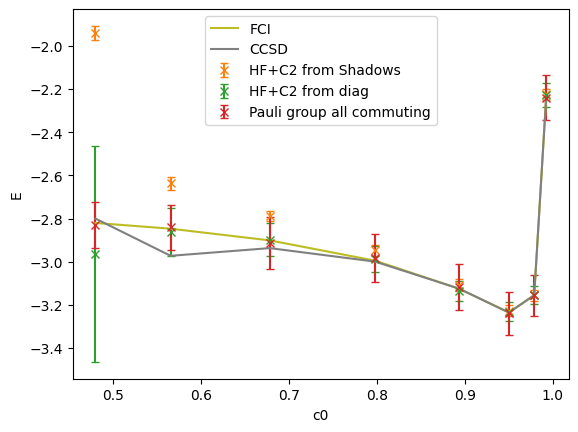

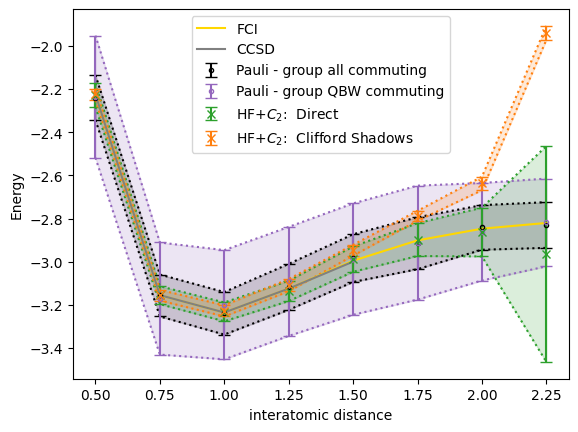

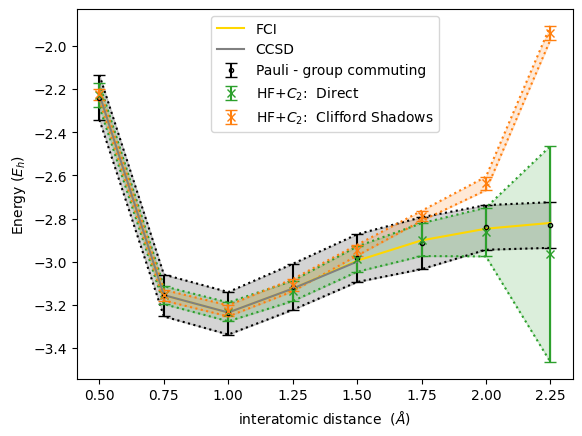

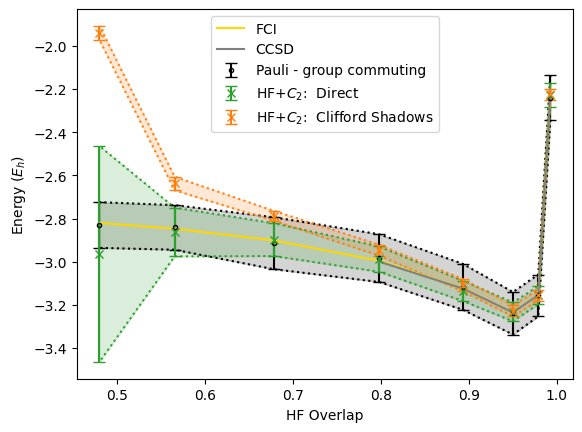

In [2]:
#data_files_list=["0.01","1.0","2.0","3.0","4.0","5.0","6.0","7.0","8.0","12.0","16.0"]
import matplotlib.pyplot as plt
import numpy as np
from itertools import zip_longest
import pandas as pd

data_files_list=["0.5","0.75","1.0","1.25","1.5","1.75","2.0","2.25"]#,"2.75","3.0"]#,"16.0"]
# ccsd_E_list=[-2.225023717166399,-3.155099941217117,-3.235677082524775,-3.1248029341639816,-2.9998514912772127,-2.937166560021479,-2.9728789720652387,-2.8002754926317905,-2.790742200652988,-2.7876201113174357,-2.793776152844698]
c0_list=[]
fci_list=[]
ccsd_list=[]
hf_cs_list=[]
hf_meas_diag_list=[]
pauli_all_list=[]
pauli_qbw_list=[]

hf_cs_err_list=[]
hf_meas_diag_err_list=[]
pauli_all_err_list=[]
pauli_qbw_err_list=[]

hf_list=[]
for U_str in data_files_list:
    print(U_str)
    data = pd.read_csv("energy_method_comp_data/results_comp_Hydrogen1D_FCI_SV_nsite_6_nshots_1000_d_"+U_str+"_experiment.dat", sep="\s+")
    
    c0_mean=data["c0"].abs().mean()#((data["e_fci"]-data["HF+CS"])/data["e_fci"]).abs().mean()
    fci_mean=data["e_fci"].mean()
    ccsd_mean=data["CCSD"].mean()
    hf_mean=((data["e_hf"])).mean()

    data_hf_cs = data["HF+CS"].str.replace('i','j').apply(lambda x: np.real(complex(x)))
    hf_cs_mean=data_hf_cs.mean()
    hf_cs_std=data_hf_cs.std()

    hf_cs_meas_diag_mean=((data["HF+meas_diag"])).mean()
    hf_cs_meas_diag_std=((data["HF+meas_diag"])).std()

    pauli_all_mean=((data["pauli_all"])).mean()
    pauli_all_std=((data["pauli_all"])).std()


    pauli_qbw_mean=((data["pauli_qbw"])).mean()
    pauli_qbw_std=((data["pauli_qbw"])).std()

    #print(c0_mean,hf_mean, hf_cs_mean, hf_meas_diag_mean,cs_pauli_mean,all_comm_pauli_mean,qbw_comm_pauli_mean)
    c0_list.append(c0_mean)
    fci_list.append(fci_mean)
    ccsd_list.append(ccsd_mean)
    hf_list.append(hf_mean)
    
    hf_cs_list.append(hf_cs_mean)
    hf_cs_err_list.append(hf_cs_std)

    hf_meas_diag_list.append(hf_cs_meas_diag_mean)
    hf_meas_diag_err_list.append(hf_cs_meas_diag_std)

    pauli_all_list.append(pauli_all_mean)
    pauli_all_err_list.append(pauli_all_std)

    pauli_qbw_list.append(pauli_qbw_mean)
    pauli_qbw_err_list.append(pauli_qbw_std)
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=3.,c="C1",marker="x",mfc="none",ls="none",label="HF+C2 from Shadows")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=3.,c="C2",marker="x",mfc="none",ls="none",label="HF+C2 from diag")
plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=3.,c="C3",marker="x",mfc="none",ls="none",label="Pauli group all commuting")
# plt.errorbar(c0_list,pauli_qbw_list,pauli_qbw_err_list,capsize=3.,c="C4",marker="x",mfc="none",ls="none",label="Pauli group QBW commuting")
# plt.plot(c0_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="C8",label="FCI")  
plt.plot(c0_list,ccsd_list,c="grey",label="CCSD")    
plt.xlabel("c0")
plt.ylabel("E")
plt.legend()
#plt.ylim(-0.1,1.0)
#plt.savefig("../figures/meas_method_comp_E_Hubbard1d_12qb_150shots.png",bbox_inches="tight",dpi=500)
plt.figure()

U_list=[float(x) for x in data_files_list]
pauli_all_perr=[pauli_all_list[x]+pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_all_merr=[pauli_all_list[x]-pauli_all_err_list[x] for x in np.arange(len(pauli_all_list))]
pauli_qbw_perr=[pauli_qbw_list[x]+pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
pauli_qbw_merr=[pauli_qbw_list[x]-pauli_qbw_err_list[x] for x in np.arange(len(pauli_qbw_list))]
hf_cs_perr=[hf_cs_list[x]+hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_cs_merr=[hf_cs_list[x]-hf_cs_err_list[x] for x in np.arange(len(hf_cs_list))]
hf_meas_diag_perr=[hf_meas_diag_list[x]+hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]
hf_meas_diag_merr=[hf_meas_diag_list[x]-hf_meas_diag_err_list[x] for x in np.arange(len(hf_meas_diag_list))]

plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group all commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="C4",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
plt.plot(U_list,pauli_qbw_perr,c="C4",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_qbw_merr,c="C4",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")   
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="C4",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance")
plt.ylabel("Energy")
plt.legend()
plt.figure()



plt.errorbar(U_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(U_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(U_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(U_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(U_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(U_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(U_list,fci_list,c="gold",label="FCI")  
plt.plot(U_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(U_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(U_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(U_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("interatomic distance"+r"  ($\AA$)")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

# plt.savefig("../figures/figures_for_CS_paper/meas_method_comp_d_vs_E_Hydrogen1d_20qb_1e3shots.png",bbox_inches="tight",dpi=500)
plt.figure()

plt.errorbar(c0_list,pauli_all_list,pauli_all_err_list,capsize=4.,c="black",marker=".",mfc="none",ls="none",label="Pauli - group commuting")
plt.plot(c0_list,pauli_all_merr,c="black",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,pauli_all_perr,c="black",marker="none",mfc="none",ls="dotted")
# plt.errorbar(U_list,pauli_qbw_list,pauli_qbw_err_list,capsize=4.,c="grey",marker=".",mfc="none",ls="none",label="Pauli - group QBW commuting")
# plt.plot(U_list,pauli_qbw_perr,c="grey",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,pauli_qbw_merr,c="grey",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_meas_diag_list,hf_meas_diag_err_list,capsize=4.,c="C2",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Direct")
plt.plot(c0_list,hf_meas_diag_perr,c="C2",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_meas_diag_merr,c="C2",marker="none",mfc="none",ls="dotted")
plt.errorbar(c0_list,hf_cs_list,hf_cs_err_list,capsize=4.,c="C1",marker="x",mfc="none",ls="none",label="HF+"+r"$C_2$"+":  Clifford Shadows")
plt.plot(c0_list,hf_cs_perr,c="C1",marker="none",mfc="none",ls="dotted")
plt.plot(c0_list,hf_cs_merr,c="C1",marker="none",mfc="none",ls="dotted")
# plt.plot(U_list,hf_list,c="C7",label="HF")   
plt.plot(c0_list,fci_list,c="gold",label="FCI")  
plt.plot(c0_list[:5],ccsd_list[:5],c="grey",label="CCSD")   
# plt.plot(U_list,ccsd_E_list,c="grey",label="CCSD") 
plt.fill_between(c0_list, pauli_all_perr, pauli_all_merr,color="black",alpha=0.17)
# plt.fill_between(U_list, pauli_qbw_perr, pauli_qbw_merr,color="grey",alpha=0.17)
plt.fill_between(c0_list, hf_meas_diag_perr, hf_meas_diag_merr,color="C2",alpha=0.17)
plt.fill_between(c0_list, hf_cs_perr, hf_cs_merr,color="C1",alpha=0.17)
plt.xlabel("HF Overlap")
plt.ylabel("Energy"+r" ($E_h$)")
plt.legend()

In [ ]:
from pyscf import gto, scf, ao2mo, fci, ci
from pyscf import cc as cupclus

nsite = 6
d = 2.25

my_atom=[("H 0. 0. %f" % xyz) for xyz in [d*x for x in list(range(nsite))]]
'''

Setting up two site Hubbard model

'''

num_e = nsite




mol = gto.M(
    #atom = 'H 0 0 0; H 0 0 1.0; H 0 0 2.0; H 0 0 3.0',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 2.',#; H 0 0 4.0; H 0 0 6.0',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 1.55; H 0 0 3.1; H 0 0 4.65',  # in Angstrom
    #atom = 'H 0 0 0; H 0 0 2.',#; H 0 0 4.0; H 0 0 6.0',  # in Angstrom
    atom=my_atom,
    basis = 'sto-3g',
    symmetry = True,
    verbose = 3
)
nelec = mol.nelec
myhf = mol.RHF().run()
assert(myhf.converged)




cc = cupclus.CCSD(myhf)
cc.kernel()
print('CCSD total energy: {}'.format(cc.e_tot))
CCSD_energy = cc.e_tot



converged SCF energy = -2.22681546664541


<class 'pyscf.cc.ccsd.CCSD'> does not have attributes  converged


CCSD not converged
E(CCSD) = -2.800280795215931  E_corr = -0.5734653285705232
CCSD total energy: -2.8002807952159308


In [8]:
myhf.energy_nuc()

np.float64(2.046151882224)